In [1]:
import sympy as sym

import numpy as np

import repeated_play

In [2]:
import itertools

In [3]:
def trnsf_transition_m_memory_two(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [4]:
def trnsf_transition_m_memory_three(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [5]:
r, s, t, p = sym.symbols("R, S, T, P")

In [6]:
q1, q2, q3, q4 = sym.symbols(r"\tilde{p}_1, \tilde{p}_2, \tilde{p}_3, \tilde{p}_4")

In [7]:
p1, p2, p3, p4 = sym.symbols(r"p_1, p_2, p_3, p_4")

### Algebra

In [11]:
rhs = (2 * p + r * (p4 - 3)) / (p - 1) - p2

In [12]:
lhs = (p * (p2 - 1) - p2 - 1) / r - p4

In [13]:
lhs

-p_4 + (P*(p_2 - 1) - p_2 - 1)/R

In [19]:
(hs).factor().collect(p2).collect(p4)

-(-P**2 - 2*P*R + 3*R**2 + p_2*(P**2 + P*R - 2*P - R + 1) + p_4*(-P*R - R**2 + R) + 1)/(R*(P - 1))

In [32]:
sym.solve(rhs < lhs, p2).rhs.collect(r).collect(p)

-(P**2 + R**2*(p_4 - 3) + R*(P*(p_4 + 2) - p_4) - 1)/(R*(P - 1))

### $n=2$

In [12]:
M = trnsf_transition_m_memory_two([q1, q2, q3, q4], analytical=True)

In [13]:
print(sym.latex(M))

\left[\begin{matrix}\tilde{p}_1 & 1 - \tilde{p}_1 & 0 & 0\\0 & 0 & \tilde{p}_2 & 1 - \tilde{p}_2\\\tilde{p}_3 & 1 - \tilde{p}_3 & 0 & 0\\0 & 0 & \tilde{p}_4 & 1 - \tilde{p}_4\end{matrix}\right]


Then the payoff of the self-reactive player in the general repeated prisoner's dilemma is 


$pi(q,p) = aR \cdot R + aS \cdot S + aT \cdot T + aP \cdot P.$

Here, the coefficients are, for example:

$aR = vCC  pCC  qCC + vCD  pCD  qCD + vDC  pDC  qDC + vDD  pDD  qDD. $

In [16]:
pure_self_reactive = list(itertools.product([0, 1], repeat=4))

In [23]:
player = [p1, p2, p3, p4]

In [24]:
coplayer = pure_self_reactive[0]

In [25]:
M = trnsf_transition_m_memory_two(coplayer, analytical=False)

In [32]:
ss = repeated_play.stationary_distribution(M)[0]

In [33]:
rho_q = ss[0] + ss[1]

In [37]:
rho_p = sum([ss[i] * player[i] for i in range(4)])

In [42]:
(rho_p * rho_q * r + rho_p * (1 - rho_q) * s + (1 - rho_p) * rho_q  * t 
 + (1 - rho_p) * (1 - rho_q)  * p).factor()

-1.0*(P*p_4 - P - S*p_4)

In [209]:
r, s, t, p = 3, 0, 5, 1

q_v1, q_v2, q_v3, q_v4 = pure_self_reactive[1]

np.random.seed(0)

p1, p2, p3, p4 = np.random.random(4)

player = [p1, p2, p3, p4]
    
coplayer = [q_v1, q_v2, q_v3, q_v4]

M = trnsf_transition_m_memory_two(coplayer, analytical=False)

ss = repeated_play.stationary_distribution(M)[0]

rho_q = ss[0] + ss[1]

rho_p = sum([ss[i] * player[i] for i in range(4)])

x1 = sum([ss[i] * player[i] * coplayer[i] for i in range(4)])
x2 = sum([ss[i] * player[i] * (1 - coplayer[i]) for i in range(4)])
x3 = sum([ss[i] * (1 - player[i]) * coplayer[i] for i in range(4)])
x4 = sum([ss[i] * (1 - player[i]) * (1 - coplayer[i]) for i in range(4)])

payoff = (x1 * r + x2 * s + x3  * t + x4  * p)


M2 = repeated_play.transition_matrix_repeated_game([p1, p2, p1, p2, p3, p4, p3, p4, 
                                                    p1, p2, p1, p2, p3, p4, p3, p4],
                                                   [q_v1, q_v1, q_v2, q_v2, q_v1, q_v1, q_v2, q_v2, 
                                                    q_v3, q_v3, q_v4, q_v4, q_v3, q_v3, q_v4, q_v4],
                                                   memory="two",
                                                   analytical=False)

ss2 = repeated_play.stationary_distribution(M2, analytical=False)

assert np.isclose(payoff, sum(ss2 @ np.array([r, s, t, p] * 4)))

In [405]:
r, s, t, p = 3, 0, 5, 1

q_v1, q_v2, q_v3, q_v4 = pure_self_reactive[1]

np.random.seed(0)

p1, p2, p3, p4 = np.random.random(4)

player = [p1, p2, p3, p4]
    
coplayer = [q_v1, q_v2, q_v3, q_v4]

M = trnsf_transition_m_memory_two(coplayer, analytical=False)

ss = repeated_play.stationary_distribution(M)[0]

rho_q = ss[0] + ss[1]

rho_p = sum([ss[i] * player[i] for i in range(4)])

x1 = sum([ss[i] * player[i] * coplayer[i] for i in range(4)])
x2 = sum([ss[i] * player[i] * (1 - coplayer[i]) for i in range(4)])
x3 = sum([ss[i] * (1 - player[i]) * coplayer[i] for i in range(4)])
x4 = sum([ss[i] * (1 - player[i]) * (1 - coplayer[i]) for i in range(4)])

payoff2 = (x1 * r + x3 * s + x2  * t + x4  * p)


M2 = repeated_play.transition_matrix_repeated_game([p1, p2, p1, p2, p3, p4, p3, p4, 
                                                    p1, p2, p1, p2, p3, p4, p3, p4],
                                                   [q_v1, q_v1, q_v2, q_v2, q_v1, q_v1, q_v2, q_v2, 
                                                    q_v3, q_v3, q_v4, q_v4, q_v3, q_v3, q_v4, q_v4],
                                                   memory="two",
                                                   analytical=False)

ss2 = repeated_play.stationary_distribution(M2, analytical=False)

assert np.isclose(payoff2, sum(ss2 @ np.array([r, t, s, p] * 4)))

### Analytical Expressions

In [406]:
p1, p2, p3, p4 = sym.symbols(r"p_1, p_2, p_3, p_4")

player = [1, p2, p3, p4]

r, s, t, p = sym.symbols("R, S, T, P")

In [407]:
payoffs = []

for i, coplayer in enumerate(pure_self_reactive):
    
    M = trnsf_transition_m_memory_two(coplayer, analytical=False)
    
    states = repeated_play.stationary_distribution(M)
    
    for ss in states:
        
        x1 = sum([ss[i] * player[i] * coplayer[i] for i in range(4)])
        x2 = sum([ss[i] * player[i] * (1 - coplayer[i]) for i in range(4)])
        x3 = sum([ss[i] * (1 - player[i]) * coplayer[i] for i in range(4)])
        x4 = sum([ss[i] * (1 - player[i]) * (1 - coplayer[i]) for i in range(4)])
        
        payoff = (x1 * r + x3 * s + x2  * t + x4  * p).factor()
        
        payoffs.append((i, payoff))
    


In [408]:
len(payoffs)

In [409]:
payoffs

In [410]:
payoffs[0][1] == payoffs[2][1] == payoffs[5][1] == payoffs[8][1] == payoffs[11][1] == payoffs[15][1] == payoffs[19][1]

True

In [411]:
payoffs[0][1] == payoffs[23][1]

True

In [421]:
wrt2 =  -(p * (- 2 + p2  + p3 ) - r * p4 + s * (p4 - 1) - t * (p2 + p3)) / 3

In [422]:
(wrt2 - payoffs[1][1]).factor()

In [423]:
payoffs[3][1]

In [430]:
wrt3 = ( p * (1 - p2) + r * (p3 + p4) - s * (p3 + p4 - 2) + t * (p2 + 1)) / 4

In [431]:
(wrt3 - payoffs[3][1]).factor()

In [432]:
payoffs[4][1]

In [439]:
wrt4 = (p * (- p3 + 1) + r * p2 - s * (p2 - 1) + t * p3) / 2

In [440]:
(wrt4 - payoffs[4][1]).expand()

In [441]:
(wrt4 - payoffs[6][1]).expand()

In [442]:
 payoffs[7][1]

In [443]:
wrt5 = (r * (p2 + p3) - s * (p2 + p3 - 2) + t) / 3

In [444]:
(wrt5 - payoffs[7][1]).factor()

In [445]:
payoffs[9][1] == payoffs[7][1]

True

In [446]:
payoffs[10][1] == payoffs[13][1] == payoffs[14][1] == payoffs[16][1] == payoffs[18][1] == payoffs[21][1] == payoffs[22][1]

True

In [447]:
payoffs[24][1] == payoffs[10][1] 

True

In [448]:
(wrt2 - payoffs[12][1]).factor()

In [449]:
(wrt4 - payoffs[17][1]).factor()

In [468]:
payoffs[20][1] == payoffs[17][1]

True

In [453]:
(payoffs[0][1] - (p * (1 - p4) + t * p4)).factor()

In [455]:
sym.init_printing(False)

(p * (1 - p4) + t * p4)

P*(1 - p_4) + T*p_4

In [458]:
payoffs[2][1] == payoffs[5][1] == payoffs[8][1] == payoffs[11][1] == payoffs[15][1] == payoffs[19][1] ==  payoffs[23][1]

True

In [461]:
payoffs[2][0], payoffs[5][0], payoffs[8][0], payoffs[11][0], payoffs[15][0],  payoffs[19][0],   payoffs[23][0]


(2, 4, 6, 8, 10, 12, 14)

In [462]:
wrt2

-P*(p_2 + p_3 - 2)/3 + R*p_4/3 - S*(p_4 - 1)/3 + T*(p_2 + p_3)/3

In [464]:
payoffs[1][0],  payoffs[12][0]

(1, 9)

In [465]:
wrt3

P*(1 - p_2)/4 + R*(p_3 + p_4)/4 - S*(p_3 + p_4 - 2)/4 + T*(p_2 + 1)/4

In [466]:
 payoffs[3][0]

3

In [467]:
wrt4

P*(1 - p_3)/2 + R*p_2/2 - S*(p_2 - 1)/2 + T*p_3/2

In [472]:
 payoffs[4][1] == payoffs[6][1] == payoffs[17][1] ==  payoffs[20][1]

True

In [473]:
payoffs[4][0], payoffs[6][0], payoffs[17][0], payoffs[20][0]

(4, 5, 12, 13)

In [474]:
wrt5

R*(p_2 + p_3)/3 - S*(p_2 + p_3 - 2)/3 + T/3

In [475]:
payoffs[9][1] == payoffs[7][1]

True

In [476]:
payoffs[9][0], payoffs[7][0]

(7, 6)

In [477]:
payoffs[10][1] == payoffs[13][1] == payoffs[14][1] == payoffs[16][1] == payoffs[18][1] == payoffs[21][1] == payoffs[22][1] == payoffs[24][1]

True

In [479]:
payoffs[10][0], payoffs[13][0], payoffs[14][0], payoffs[16][0], payoffs[18][0], payoffs[21][0], payoffs[22][0], payoffs[24][0]


(8, 9, 10, 11, 12, 13, 14, 15)

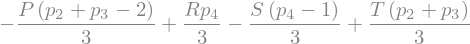

In [481]:
sym.init_printing(True)

wrt2

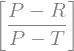

In [485]:
sym.solve(payoffs[0][1] - r, p4)

In [515]:
x = sym.solve(wrt2.subs({t:1, s:0}).factor(), p3)[0]

In [516]:
y = sym.solve(wrt3.subs({t:1, s:0}).factor(), p3)[0]

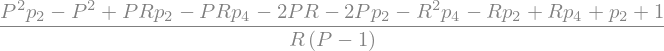

In [520]:
(y - x).factor()

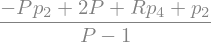

In [521]:
x

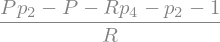

In [522]:
y

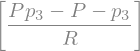

In [510]:
sym.solve(wrt4.subs({t:1, s:0}).factor(), p2)

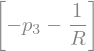

In [511]:
sym.solve(wrt5.subs({t:1, s:0}).factor(), p2)

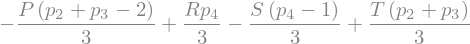

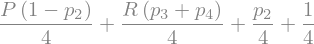

In [530]:
wrt3.subs({t:1, s:0})

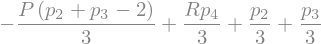

In [528]:
wrt2.subs({t:1, s:0})

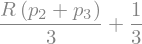

In [531]:
wrt5.subs({t:1, s:0})

In [534]:
payoffs[0][1].subs({t:1, s:0})

In [536]:
payoffs[0][1].subs({t:1, s:0})

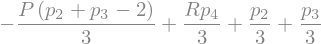

In [542]:
wrt2.subs({t:1, s:0})

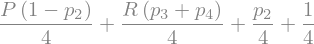

In [543]:
wrt3.subs({t:1, s:0})

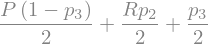

In [544]:
wrt4.subs({t:1, s:0})

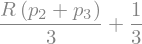

In [545]:
wrt5.subs({t:1, s:0})

In [551]:
print(sym.latex(sym.solve(payoffs[0][1] - r, p4)[0]))

\frac{P - R}{P - T}


In [561]:
sym.latex(sym.solve(wrt5 - r, p2 + p3)[0].simplify())

'\\frac{3 R - 2 S - T}{R - S}'

In [574]:
print(sym.latex(wrt4.expand().collect(p2).collect(p3) - r))

\frac{P}{2} - R + \frac{S}{2} + p_{2} \left(\frac{R}{2} - \frac{S}{2}\right) + p_{3} \left(- \frac{P}{2} + \frac{T}{2}\right)


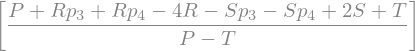

In [584]:
sym.solve(wrt3.factor().collect(p3 + p4).collect(p2) - r, p2)

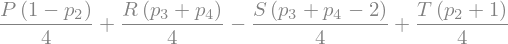

In [585]:
wrt3

In [590]:
(wrt3 - ((p3 + p4) * (r - s) + 2 * s + p2 * (t - p) + p + t) / 4).factor()

In [632]:
print(sym.latex(sym.solve(((p3 + p4) * (r - s) + 2 * s + p2 * (t - p) + p + t) / 4, p3 + p4)[0]))

\frac{P p_{2} - P - 2 S - T p_{2} - T}{R - S}


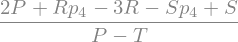

In [644]:
sym.solve(wrt2 - r, p2 + p3)[0]

In [641]:
print(sym.latex(sym.solve(wrt2 - r, p2 + p3)[0].factor()))

\frac{2 P + R p_{4} - 3 R - S p_{4} + S}{P - T}


In [602]:
e5 = (2 * r - p - p3 * (1 - p)) / r

In [619]:
e6 = (3 *  r - 1) / r - p3

In [620]:
sym.solve((e6 - e5).expand(), r)

In [621]:
(e6 - e5).subs({r: 1 - p}).factor()

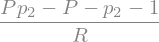

In [639]:
sym.solve(wrt3.subs({t:1, s:0}).factor().collect(r), p3 + p4)[0].simplify()

In [640]:
p2 * (p - 1) - p - 1

In [631]:
((1 + p2) * (1 - p) + (p3 + p4) * r)

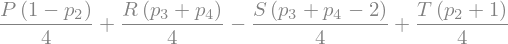

In [633]:
wrt3.subs(t)